# Impact on Initial Mass Function

When determining stellar masses in young stellar associations, non-magnetic models are often adopted. However, if magnetic inhibition of convection is an important process in governing the structure of young pre-main-sequence stars, then the mass-Teff relationship will be shifted. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Define the IMF using Chabrier (2003) log-normal distribution

In [2]:
def chabrierIMF(N, mass_low, mass_high):
    """ define a chabrier IMF """
    alpha = 2.3
    dm    = 0.002
    masses = np.arange(mass_low, mass_high, dm)
    masses_lo = np.arange(mass_low, 1.0, dm)
    masses_hi = np.arange(1.0, mass_high, dm)
    
    # below 1.0 Msun
    lo_m_prob = 0.086*np.exp(-(np.log10(masses_lo) - np.log10(0.22))**2/(2.0*0.57**2))/masses_lo
    hi_m_prob = masses_hi**-alpha*dm
    hi_m_prob = (lo_m_prob[-1]/hi_m_prob[0])*hi_m_prob
    
    norm_factor = 1.0/(np.sum(lo_m_prob) + np.sum(hi_m_prob))
    
    return np.column_stack((masses, float(N)*norm_factor*np.append(lo_m_prob, hi_m_prob)))

Create a synthetic population of stars using a Chabrier IMF and magnetic models.

In [43]:
cluster = chabrierIMF(10000, 0.1, 1.7)

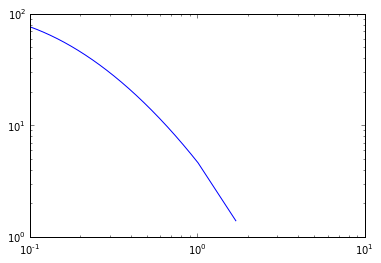

In [44]:
plt.loglog(cluster[:,0], cluster[:,1])

In [45]:
mag_iso = np.genfromtxt('../models/iso/mag/dmestar_00010.0myr_z+0.00_a+0.00_phx_magBeq.iso')

In [46]:
from scipy.interpolate import interp1d

icurve = interp1d(mag_iso[:,0], mag_iso[:,1], kind='linear')
Teffs  = icurve(cluster[:, 0])

Now, what would this population look like if we accidentally used the wrong stellar model isochrone to derive the IMF?

In [50]:
std_iso = np.genfromtxt('../models/iso/std/dmestar_00005.0myr_z+0.00_a+0.00_phx.iso')

In [51]:
icurve  = interp1d(std_iso[:,1], std_iso[:,0], kind='linear')
Masses  = icurve(Teffs[24:])

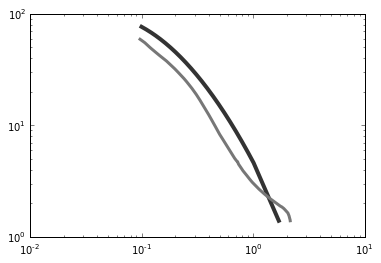

In [52]:
plt.loglog(cluster[:, 0], cluster[:, 1], '-', lw=4, c='#333333')
plt.loglog(Masses, cluster[24:, 1], '-', lw=3, c='#777777')